In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')

C:\Users\Asus\anaconda3\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [103]:
df = pd.read_csv(r"autodata.csv")
df

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,7,Minivan,yes,$0,0,No,0,$0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,...,15,Minivan,no,$0,0,No,2,$0,17.0,0
10298,61970712,0,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,...,6,Panel Truck,no,$0,0,No,0,$0,1.0,0
10299,849208064,0,48.0,0,15.0,"$39,837",No,"$170,611",Yes,z_F,...,7,z_SUV,no,$0,0,No,0,$0,1.0,0
10300,627828331,0,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,...,6,Minivan,no,$0,0,No,0,$0,11.0,0


In [3]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [5]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [120]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Data_Profiling_v1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

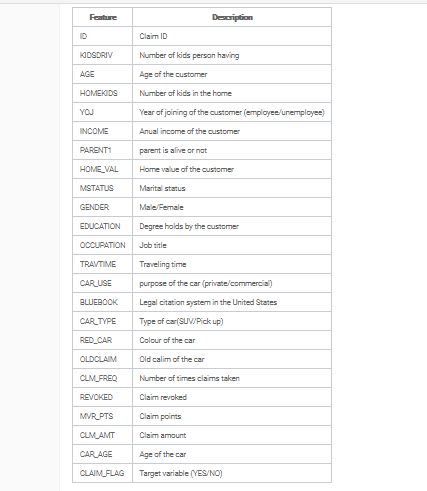

In [121]:
url = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2566208%2F50dd4f899017ad7c6ba848cfa513a853%2FScreenshot_2020-04-17%20GreyAtom%20-%20Learning%20Platform(1).png?generation=1587141048165615&alt=media"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [107]:
for i in df:
    if df[i].dtype == "object":
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace(",","")
        df[i] = df[i].str.replace("z_","")
        try:
            df[i] = df[i].astype("float")
        except:
            pass

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  float64
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  float64
 19  CLM_FREQ    10302 non-nul

In [101]:
df

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,67349.0,No,0.0,No,M,...,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0
1,132761049,0,43.0,0,11.0,91449.0,No,257252.0,No,M,...,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0
2,921317019,0,48.0,0,11.0,52881.0,No,0.0,No,M,...,1,Van,yes,0.0,0,No,2,0.0,10.0,0
3,727598473,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,...,4,SUV,no,38690.0,2,No,3,0.0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,...,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,...,15,Minivan,no,0.0,0,No,2,0.0,17.0,0
10298,61970712,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,...,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0
10299,849208064,0,48.0,0,15.0,39837.0,No,170611.0,Yes,F,...,7,SUV,no,0.0,0,No,0,0.0,1.0,0
10300,627828331,0,50.0,0,7.0,43445.0,No,149248.0,Yes,F,...,6,Minivan,no,0.0,0,No,0,0.0,11.0,0


In [102]:
df.drop("ID",axis=1,inplace=True)
df

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,...,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,...,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,...,1,Van,yes,0.0,0,No,2,0.0,10.0,0
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,...,4,SUV,no,38690.0,2,No,3,0.0,10.0,0
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,...,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,...,15,Minivan,no,0.0,0,No,2,0.0,17.0,0
10298,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,...,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0
10299,0,48.0,0,15.0,39837.0,No,170611.0,Yes,F,<High School,...,7,SUV,no,0.0,0,No,0,0.0,1.0,0
10300,0,50.0,0,7.0,43445.0,No,149248.0,Yes,F,Bachelors,...,6,Minivan,no,0.0,0,No,0,0.0,11.0,0


In [126]:
X = df.drop("CLAIM_FLAG",axis=1)
y = df.CLAIM_FLAG

# X = df
# y = X.pop("CLAIM_FLAG")
# X

In [127]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 10302, dtype: int64

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [129]:
a = "Serdar"
print(f"Merhaba {a}")

Merhaba Serdar


In [130]:
y_train_sum = y_train.sum()
y_train_len = len(y_train)
y_train_oran = y_train_sum / y_train_len

print(f"Train Dataset 1 - 0 oranı: {y_train_oran:.2%} ")

y_test_sum = y_test.sum()
y_test_len = len(y_test)
y_test_oran = y_test_sum / y_test_len

print(f"Test Dataset 1 - 0 oranı: {y_test_oran:.2%} ")

Train Dataset 1 - 0 oranı: 26.39% 
Test Dataset 1 - 0 oranı: 27.70% 


In [131]:
print(f"Train Dataset 1 - 0 oranı: {y_train_oran:.2%} ")
print(y_train.value_counts() / y_train.shape[0] * 100)
print("----------------------")
print(f"Test Dataset 1 - 0 oranı: {y_test_oran:.2%} ")
print(y_test.value_counts() / y_test.shape[0] * 100)


Train Dataset 1 - 0 oranı: 26.39% 
0    73.607572
1    26.392428
Name: CLAIM_FLAG, dtype: float64
----------------------
Test Dataset 1 - 0 oranı: 27.70% 
0    72.295002
1    27.704998
Name: CLAIM_FLAG, dtype: float64


#### Stratify Sonrası

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43, stratify = df.CLAIM_FLAG)

In [133]:
y_train_sum = y_train.sum()
y_train_len = len(y_train)
y_train_oran = y_train_sum / y_train_len

print(f"Train Dataset 1 - 0 oranı: {y_train_oran:.2%} ")

y_test_sum = y_test.sum()
y_test_len = len(y_test)
y_test_oran = y_test_sum / y_test_len

print(f"Test Dataset 1 - 0 oranı: {y_test_oran:.2%} ")

Train Dataset 1 - 0 oranı: 26.66% 
Test Dataset 1 - 0 oranı: 26.64% 


In [134]:
X_train

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
1457,324180718,0,52.0,0,5.0,54545.0,No,0.0,No,F,...,17930.0,1,Sports Car,no,4037.0,1,No,0,0.0,10.0
6291,539230454,0,43.0,0,0.0,0.0,No,0.0,No,F,...,1620.0,1,SUV,no,0.0,0,No,1,0.0,6.0
4451,78611832,0,62.0,0,12.0,69331.0,No,276064.0,Yes,F,...,26360.0,17,Sports Car,no,5837.0,3,No,0,0.0,19.0
1698,197386878,0,47.0,0,10.0,129926.0,No,0.0,No,M,...,19190.0,1,Van,yes,0.0,0,No,2,2840.0,9.0
4660,730441601,0,53.0,0,13.0,17424.0,No,0.0,Yes,M,...,10860.0,1,Pickup,yes,0.0,0,No,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,945912532,0,51.0,0,13.0,37040.0,No,0.0,No,F,...,10010.0,6,Minivan,no,0.0,0,No,0,0.0,1.0
6796,557303264,0,49.0,0,14.0,172229.0,No,388586.0,Yes,M,...,18720.0,4,Van,yes,0.0,0,No,0,0.0,8.0
3767,503928354,0,52.0,0,12.0,50853.0,No,0.0,No,F,...,9920.0,14,SUV,no,0.0,0,No,0,0.0,19.0
484,727784328,0,41.0,0,6.0,43889.0,No,0.0,No,F,...,18010.0,4,SUV,no,0.0,0,No,1,0.0,7.0


In [135]:
target_encoder = TargetEncoder()

In [136]:
X_train_encoded = target_encoder.fit_transform(X_train,y_train)

In [137]:
X_train_encoded

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
1457,324180718,0,52.0,0,5.0,54545.0,0.238785,0.0,0.334652,0.275800,...,17930.0,1,0.345679,0.268786,4037.0,1,0.240648,0,0.0,10.0
6291,539230454,0,43.0,0,0.0,0.0,0.238785,0.0,0.334652,0.275800,...,1620.0,1,0.290591,0.268786,0.0,0,0.240648,1,0.0,6.0
4451,78611832,0,62.0,0,12.0,69331.0,0.238785,276064.0,0.221437,0.275800,...,26360.0,17,0.345679,0.268786,5837.0,3,0.240648,0,0.0,19.0
1698,197386878,0,47.0,0,10.0,129926.0,0.238785,0.0,0.334652,0.255851,...,19190.0,1,0.281633,0.261128,0.0,0,0.240648,2,2840.0,9.0
4660,730441601,0,53.0,0,13.0,17424.0,0.238785,0.0,0.221437,0.255851,...,10860.0,1,0.313210,0.261128,0.0,0,0.240648,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,945912532,0,51.0,0,13.0,37040.0,0.238785,0.0,0.334652,0.275800,...,10010.0,6,0.169366,0.268786,0.0,0,0.240648,0,0.0,1.0
6796,557303264,0,49.0,0,14.0,172229.0,0.238785,388586.0,0.221437,0.255851,...,18720.0,4,0.281633,0.261128,0.0,0,0.240648,0,0.0,8.0
3767,503928354,0,52.0,0,12.0,50853.0,0.238785,0.0,0.334652,0.275800,...,9920.0,14,0.290591,0.268786,0.0,0,0.240648,0,0.0,19.0
484,727784328,0,41.0,0,6.0,43889.0,0.238785,0.0,0.334652,0.275800,...,18010.0,4,0.290591,0.268786,0.0,0,0.240648,1,0.0,7.0


In [138]:
X_test_encoded = target_encoder.transform(X_test)

In [139]:
X_test_encoded

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
1054,387139563,0,37.0,1,9.0,67175.0,0.454374,0.0,0.334652,0.275800,...,23340.0,9,0.313210,0.268786,0.0,0,0.240648,5,0.0,22.0
4364,626621181,0,61.0,0,11.0,24049.0,0.238785,0.0,0.334652,0.255851,...,10000.0,1,0.345679,0.261128,0.0,0,0.240648,0,0.0,7.0
4503,152422030,0,51.0,1,0.0,0.0,0.238785,0.0,0.221437,0.275800,...,11800.0,7,0.290591,0.268786,0.0,0,0.240648,0,0.0,11.0
10226,441825853,0,50.0,0,11.0,127468.0,0.238785,304399.0,0.221437,0.275800,...,6500.0,4,0.290591,0.268786,0.0,0,0.240648,2,0.0,10.0
409,95033073,0,44.0,0,12.0,39852.0,0.238785,125283.0,0.221437,0.275800,...,7410.0,1,0.290591,0.268786,3704.0,2,0.240648,0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,95483524,0,33.0,2,9.0,31675.0,0.238785,159621.0,0.221437,0.275800,...,9130.0,7,0.345679,0.268786,32882.0,1,0.449658,6,7719.0,1.0
1265,481754281,0,40.0,0,0.0,0.0,0.238785,55761.0,0.334652,0.275800,...,17840.0,1,0.290591,0.268786,0.0,0,0.240648,3,0.0,18.0
2674,263196535,1,39.0,2,12.0,61612.0,0.238785,219629.0,0.221437,0.275800,...,24780.0,4,0.313210,0.268786,0.0,0,0.240648,0,0.0,1.0
4292,61087160,0,45.0,2,13.0,39163.0,0.238785,168058.0,0.221437,0.275800,...,9920.0,4,0.290591,0.268786,36025.0,3,0.240648,7,0.0,4.0


In [140]:
xgb_cl = xgb.XGBClassifier()

In [141]:
xgb_cl

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [142]:
# Create a list of models
models = [xgb.XGBClassifier()]

# Create a function to fit and score models
def fit_and_score(X_train, y_train):

    # Dictionary to store results
    results = {}

    # Loop through models
    for model in models:
        # Create cross-validation object
        cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

        # Store results
        results[str(model).split('(')[0]] = cv


    return results

# Store results in a dataframe
df_cv2 = pd.DataFrame(fit_and_score(X_train_encoded, y_train))

[12:13:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [143]:
df_cv2

,XGBClassifier
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [144]:
xgb_cl.fit(X_train_encoded,y_train)

[12:14:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
pred = xgb_cl.predict(X_test_encoded)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[1512,    0],
       [   0,  549]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00       549

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



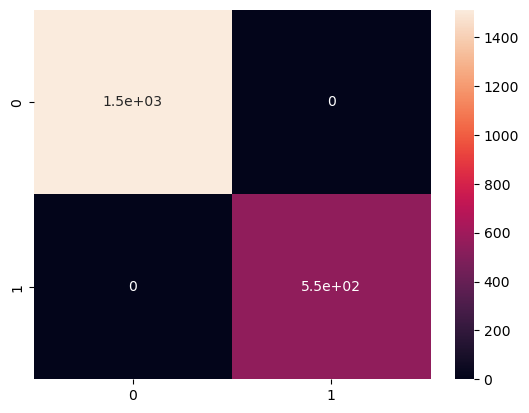

In [148]:
sns.heatmap(conf_matrix, annot = True)
print(classification_report(y_test, pred))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

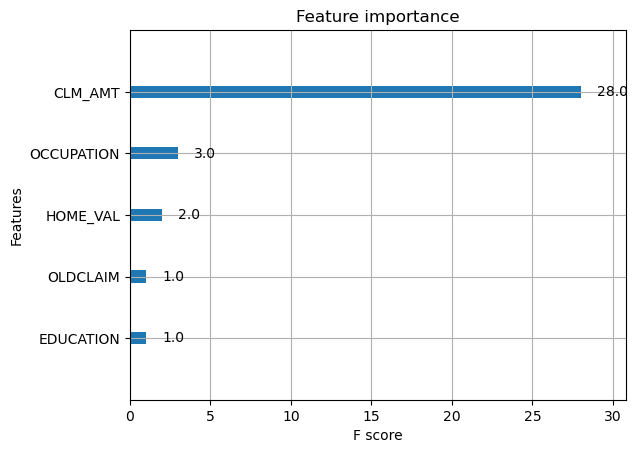

In [149]:
plot_importance(xgb_cl)

### Overfit Düzeltme

In [201]:
df = df.drop(labels=["ID","CLM_AMT"],axis=1)
df

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,...,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,0
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,...,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,0
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,...,21970.0,1,Van,yes,0.0,0,No,2,10.0,0
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,...,4010.0,4,SUV,no,38690.0,2,No,3,10.0,0
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,...,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,...,13270.0,15,Minivan,no,0.0,0,No,2,17.0,0
10298,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,...,24490.0,6,Panel Truck,no,0.0,0,No,0,1.0,0
10299,0,48.0,0,15.0,39837.0,No,170611.0,Yes,F,<High School,...,13820.0,7,SUV,no,0.0,0,No,0,1.0,0
10300,0,50.0,0,7.0,43445.0,No,149248.0,Yes,F,Bachelors,...,22550.0,6,Minivan,no,0.0,0,No,0,11.0,0


In [202]:
X = df.drop("CLAIM_FLAG",axis=1)
y = df.CLAIM_FLAG

# X = df
# y = X.pop("CLAIM_FLAG")
# X

In [203]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 10302, dtype: int64

#### Stratify Sonrası

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43, stratify = df.CLAIM_FLAG)

In [205]:
y_train_sum = y_train.sum()
y_train_len = len(y_train)
y_train_oran = y_train_sum / y_train_len

print(f"Train Dataset 1 - 0 oranı: {y_train_oran:.2%} ")

y_test_sum = y_test.sum()
y_test_len = len(y_test)
y_test_oran = y_test_sum / y_test_len

print(f"Test Dataset 1 - 0 oranı: {y_test_oran:.2%} ")

Train Dataset 1 - 0 oranı: 26.66% 
Test Dataset 1 - 0 oranı: 26.64% 


In [206]:
X_train

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE
1457,0,52.0,0,5.0,54545.0,No,0.0,No,F,Bachelors,...,Private,17930.0,1,Sports Car,no,4037.0,1,No,0,10.0
6291,0,43.0,0,0.0,0.0,No,0.0,No,F,High School,...,Private,1620.0,1,SUV,no,0.0,0,No,1,6.0
4451,0,62.0,0,12.0,69331.0,No,276064.0,Yes,F,PhD,...,Private,26360.0,17,Sports Car,no,5837.0,3,No,0,19.0
1698,0,47.0,0,10.0,129926.0,No,0.0,No,M,Masters,...,Commercial,19190.0,1,Van,yes,0.0,0,No,2,9.0
4660,0,53.0,0,13.0,17424.0,No,0.0,Yes,M,Bachelors,...,Commercial,10860.0,1,Pickup,yes,0.0,0,No,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,0,51.0,0,13.0,37040.0,No,0.0,No,F,<High School,...,Private,10010.0,6,Minivan,no,0.0,0,No,0,1.0
6796,0,49.0,0,14.0,172229.0,No,388586.0,Yes,M,PhD,...,Private,18720.0,4,Van,yes,0.0,0,No,0,8.0
3767,0,52.0,0,12.0,50853.0,No,0.0,No,F,Masters,...,Private,9920.0,14,SUV,no,0.0,0,No,0,19.0
484,0,41.0,0,6.0,43889.0,No,0.0,No,F,Bachelors,...,Private,18010.0,4,SUV,no,0.0,0,No,1,7.0


In [207]:
target_encoder = TargetEncoder()

In [208]:
X_train_encoded = target_encoder.fit_transform(X_train,y_train)

In [209]:
X_train_encoded

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE
1457,0,52.0,0,5.0,54545.0,0.238785,0.0,0.334652,0.275800,0.236692,...,0.217949,17930.0,1,0.345679,0.268786,4037.0,1,0.240648,0,10.0
6291,0,43.0,0,0.0,0.0,0.238785,0.0,0.334652,0.275800,0.346598,...,0.217949,1620.0,1,0.290591,0.268786,0.0,0,0.240648,1,6.0
4451,0,62.0,0,12.0,69331.0,0.238785,276064.0,0.221437,0.275800,0.166441,...,0.217949,26360.0,17,0.345679,0.268786,5837.0,3,0.240648,0,19.0
1698,0,47.0,0,10.0,129926.0,0.238785,0.0,0.334652,0.255851,0.196633,...,0.350912,19190.0,1,0.281633,0.261128,0.0,0,0.240648,2,9.0
4660,0,53.0,0,13.0,17424.0,0.238785,0.0,0.221437,0.255851,0.236692,...,0.350912,10860.0,1,0.313210,0.261128,0.0,0,0.240648,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,0,51.0,0,13.0,37040.0,0.238785,0.0,0.334652,0.275800,0.324654,...,0.217949,10010.0,6,0.169366,0.268786,0.0,0,0.240648,0,1.0
6796,0,49.0,0,14.0,172229.0,0.238785,388586.0,0.221437,0.255851,0.166441,...,0.217949,18720.0,4,0.281633,0.261128,0.0,0,0.240648,0,8.0
3767,0,52.0,0,12.0,50853.0,0.238785,0.0,0.334652,0.275800,0.196633,...,0.217949,9920.0,14,0.290591,0.268786,0.0,0,0.240648,0,19.0
484,0,41.0,0,6.0,43889.0,0.238785,0.0,0.334652,0.275800,0.236692,...,0.217949,18010.0,4,0.290591,0.268786,0.0,0,0.240648,1,7.0


In [210]:
X_test_encoded = target_encoder.transform(X_test)

In [211]:
X_test_encoded

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE
1054,0,37.0,1,9.0,67175.0,0.454374,0.0,0.334652,0.275800,0.166441,...,0.217949,23340.0,9,0.313210,0.268786,0.0,0,0.240648,5,22.0
4364,0,61.0,0,11.0,24049.0,0.238785,0.0,0.334652,0.255851,0.346598,...,0.350912,10000.0,1,0.345679,0.261128,0.0,0,0.240648,0,7.0
4503,0,51.0,1,0.0,0.0,0.238785,0.0,0.221437,0.275800,0.346598,...,0.217949,11800.0,7,0.290591,0.268786,0.0,0,0.240648,0,11.0
10226,0,50.0,0,11.0,127468.0,0.238785,304399.0,0.221437,0.275800,0.166441,...,0.217949,6500.0,4,0.290591,0.268786,0.0,0,0.240648,2,10.0
409,0,44.0,0,12.0,39852.0,0.238785,125283.0,0.221437,0.275800,0.346598,...,0.350912,7410.0,1,0.290591,0.268786,3704.0,2,0.240648,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0,33.0,2,9.0,31675.0,0.238785,159621.0,0.221437,0.275800,0.346598,...,0.350912,9130.0,7,0.345679,0.268786,32882.0,1,0.449658,6,1.0
1265,0,40.0,0,0.0,0.0,0.238785,55761.0,0.334652,0.275800,0.196633,...,0.217949,17840.0,1,0.290591,0.268786,0.0,0,0.240648,3,18.0
2674,1,39.0,2,12.0,61612.0,0.238785,219629.0,0.221437,0.275800,0.346598,...,0.350912,24780.0,4,0.313210,0.268786,0.0,0,0.240648,0,1.0
4292,0,45.0,2,13.0,39163.0,0.238785,168058.0,0.221437,0.275800,0.346598,...,0.217949,9920.0,4,0.290591,0.268786,36025.0,3,0.240648,7,4.0


In [212]:
xgb_cl = xgb.XGBClassifier()

In [213]:
xgb_cl

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [214]:
# Create a list of models
models = [xgb.XGBClassifier()]

# Create a function to fit and score models
def fit_and_score(X_train, y_train):

    # Dictionary to store results
    results = {}

    # Loop through models
    for model in models:
        # Create cross-validation object
        cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

        # Store results
        results[str(model).split('(')[0]] = cv


    return results

# Store results in a dataframe
df_cv2 = pd.DataFrame(fit_and_score(X_train_encoded, y_train))

[12:51:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [215]:
df_cv2

,XGBClassifier
0,0.388636
1,0.412301
2,0.410023
3,0.382688
4,0.404545


In [216]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_encoded,y_train)

[12:51:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [217]:
pred = xgb_cl.predict(X_test_encoded)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[1362,  150],
       [ 342,  207]], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1512
           1       0.58      0.38      0.46       549

    accuracy                           0.76      2061
   macro avg       0.69      0.64      0.65      2061
weighted avg       0.74      0.76      0.74      2061



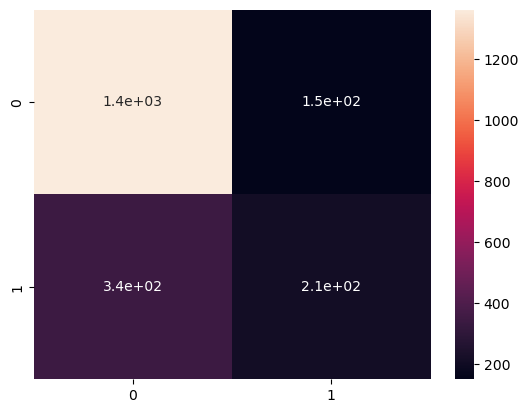

In [219]:
sns.heatmap(conf_matrix, annot = True)
print(classification_report(y_test, pred))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

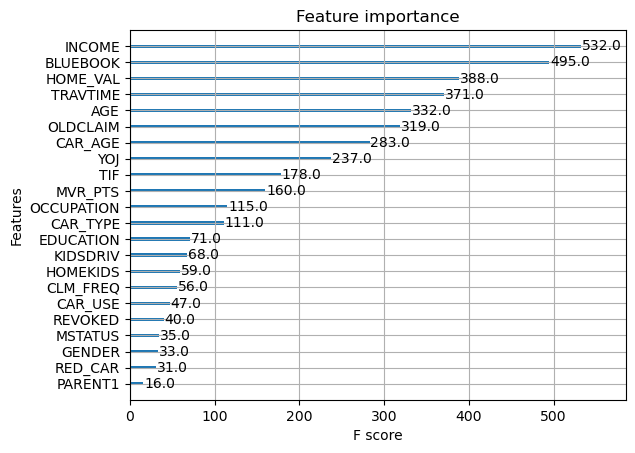

In [220]:
plot_importance(xgb_cl)

In [221]:
print(roc_auc_score(y_test,pred))

0.6389214155607599


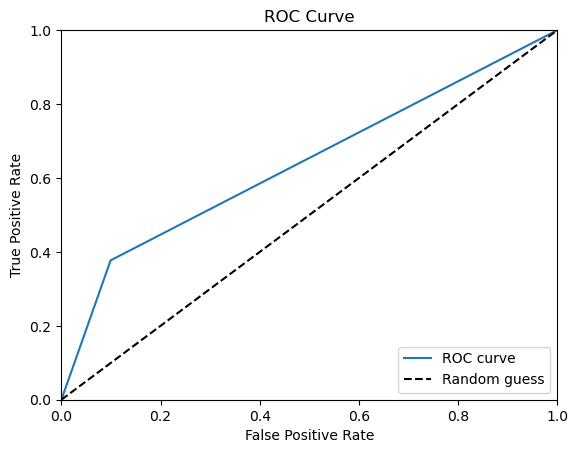

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

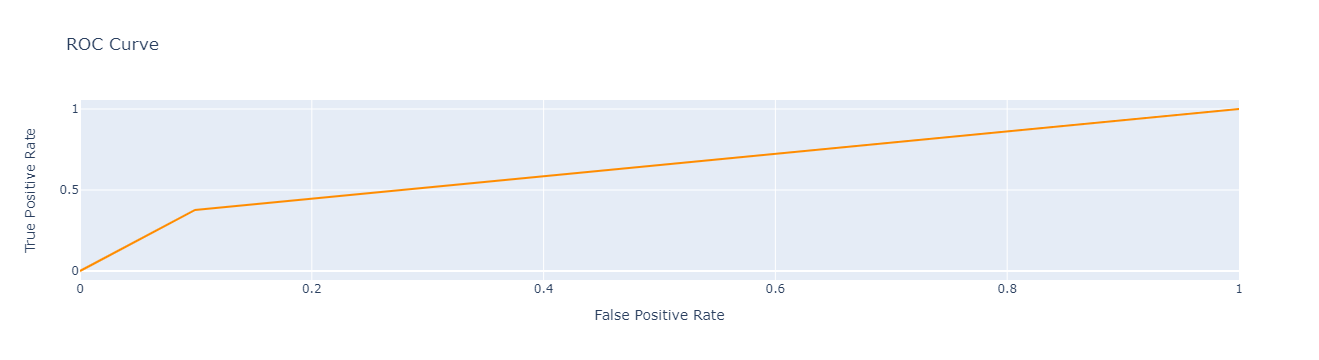

In [223]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Plotly ile ROC Curve oluşturma
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    line=dict(color='darkorange', width=2)))
fig.update_layout(title='ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  showlegend=False)
fig.show()

In [227]:
pred = xgb_cl.predict_proba(X_test_encoded)
pred

array([[0.38464528, 0.6153547 ],
       [0.6931722 , 0.30682778],
       [0.89861596, 0.10138406],
       ...,
       [0.81236696, 0.18763301],
       [0.95194733, 0.04805268],
       [0.58689487, 0.4131051 ]], dtype=float32)

In [257]:
threshold = 0.4

lst = []
lst_prob_1 = []
lst_prob_0 = []

for i in range(len(pred)):
    if pred[i][0] >= threshold:
        lst.append(0)
        lst_prob_1.append(pred[i][1]) # bir olma ihtimali
        lst_prob_0.append(pred[i][0]) 
        
    else:
        lst.append(1)
        lst_prob_1.append(pred[i][1])
        lst_prob_0.append(pred[i][0])

In [252]:
lst_prob_1

[0.6153547,
 0.30682778,
 0.6931722,
 0.10138406,
 0.89861596,
 0.01248546,
 0.98751456,
 0.8971808,
 0.05785083,
 0.94214916,
 0.06429211,
 0.93570787,
 0.38538608,
 0.6146139,
 0.18523403,
 0.814766,
 0.76865196,
 0.8508574,
 0.34051767,
 0.65948236,
 0.08809297,
 0.911907,
 0.0773115,
 0.9226885,
 0.0026986636,
 0.99730134,
 0.28689095,
 0.713109,
 0.009548462,
 0.9904515,
 0.10710529,
 0.8928947,
 0.07531273,
 0.92468727,
 0.119356826,
 0.8806432,
 0.17007452,
 0.8299255,
 0.046995394,
 0.9530046,
 0.076116495,
 0.9238835,
 0.10098881,
 0.8990112,
 0.05897475,
 0.94102526,
 0.10374251,
 0.8962575,
 0.1659108,
 0.8340892,
 0.236262,
 0.76373804,
 0.19154292,
 0.8084571,
 0.07394508,
 0.9260549,
 0.08782084,
 0.9121792,
 0.06276633,
 0.9372337,
 0.1124859,
 0.8875141,
 0.05482188,
 0.94517815,
 0.24090381,
 0.7590962,
 0.7030081,
 0.3919254,
 0.6080746,
 0.6054353,
 0.06202824,
 0.9379718,
 0.027079187,
 0.97292084,
 0.16845256,
 0.83154744,
 0.16480732,
 0.8351927,
 0.010598193,
 0.

In [253]:
lst

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1512
           1       0.60      0.31      0.41       549

    accuracy                           0.76      2061
   macro avg       0.70      0.62      0.63      2061
weighted avg       0.74      0.76      0.73      2061



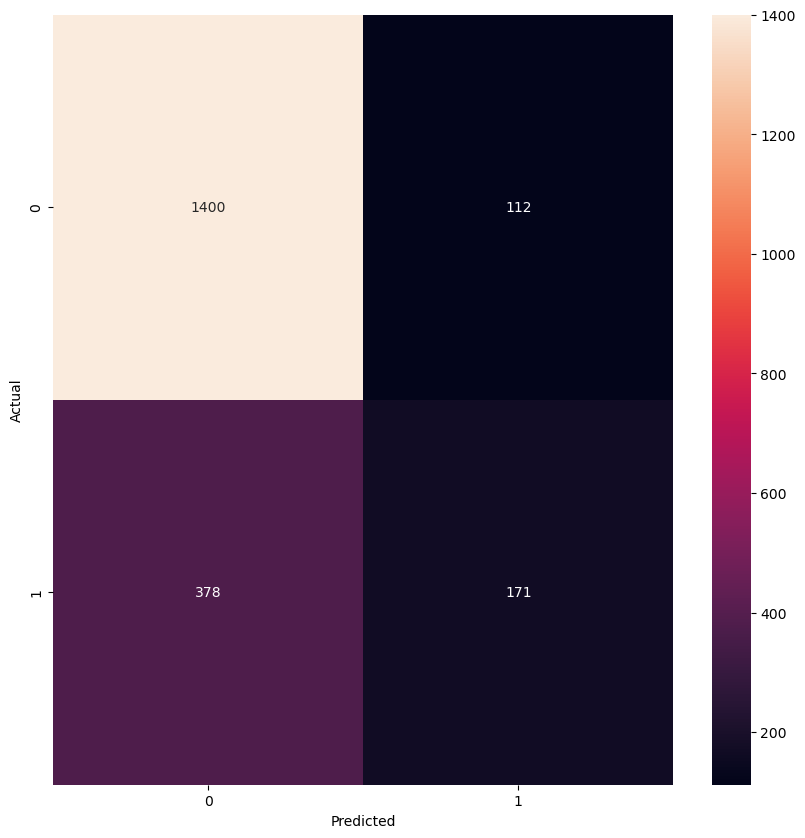

In [258]:
conf_mat = confusion_matrix(y_test,lst)
print(metrics.classification_report(y_test,lst))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [259]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test_encoded)

    # Evaluate predictions
    f1score = f1_score(y_test, y_pred)
    return f1score

In [260]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-29 14:13:02,424] A new study created in memory with name: no-name-622db98d-661e-44cf-85b5-ed5de76d3113
[I 2023-04-29 14:13:03,348] Trial 0 finished with value: 0.39622641509433965 and parameters: {'max_depth': 9, 'learning_rate': 0.15164262970203815, 'n_estimators': 371, 'min_child_weight': 10, 'gamma': 0.13693512238502642, 'subsample': 0.02868296799622341, 'colsample_bytree': 0.06581001232448402, 'reg_alpha': 0.0027862608916543064, 'reg_lambda': 5.569032802873729e-07}. Best is trial 0 with value: 0.39622641509433965.
[I 2023-04-29 14:13:04,244] Trial 1 finished with value: 0.30193905817174516 and parameters: {'max_depth': 5, 'learning_rate': 0.01885537735420629, 'n_estimators': 244, 'min_child_weight': 6, 'gamma': 1.0673538962561725e-08, 'subsample': 0.022629472704185635, 'colsample_bytree': 0.8073402092661635, 'reg_alpha': 0.09337297165711195, 'reg_lambda': 0.9056021899051261}. Best is trial 0 with value: 0.39622641509433965.
[I 2023-04-29 14:13:04,609] Trial 2 finished wi

Number of finished trials: 20
Best trial:
  Value: 0.46884899683210135
  Params: 
    max_depth: 3
    learning_rate: 0.22091768303454332
    n_estimators: 222
    min_child_weight: 4
    gamma: 0.014587899457318962
    subsample: 0.2129638875826182
    colsample_bytree: 0.29692854883164005
    reg_alpha: 1.0033130341966819e-05
    reg_lambda: 0.0002761156127205589


**MLFlow**

In [262]:
params = trial.params
params

{'max_depth': 3,
 'learning_rate': 0.22091768303454332,
 'n_estimators': 222,
 'min_child_weight': 4,
 'gamma': 0.014587899457318962,
 'subsample': 0.2129638875826182,
 'colsample_bytree': 0.29692854883164005,
 'reg_alpha': 1.0033130341966819e-05,
 'reg_lambda': 0.0002761156127205589}

In [263]:
xgb_cl = xgb.XGBClassifier(**params)
xgb_cl.fit(X_train_encoded,y_train)

[14:21:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.29692854883164005,
              enable_categorical=False, gamma=0.014587899457318962, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.22091768303454332, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=222, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1.0033130341966819e-05,
              reg_lambda=0.0002761156127205589, scale_pos_weight=1,
              subsample=0.2129638875826182, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [264]:
pred = xgb_cl.predict(X_test_encoded)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1512
           1       0.60      0.31      0.41       549

    accuracy                           0.76      2061
   macro avg       0.70      0.62      0.63      2061
weighted avg       0.74      0.76      0.73      2061



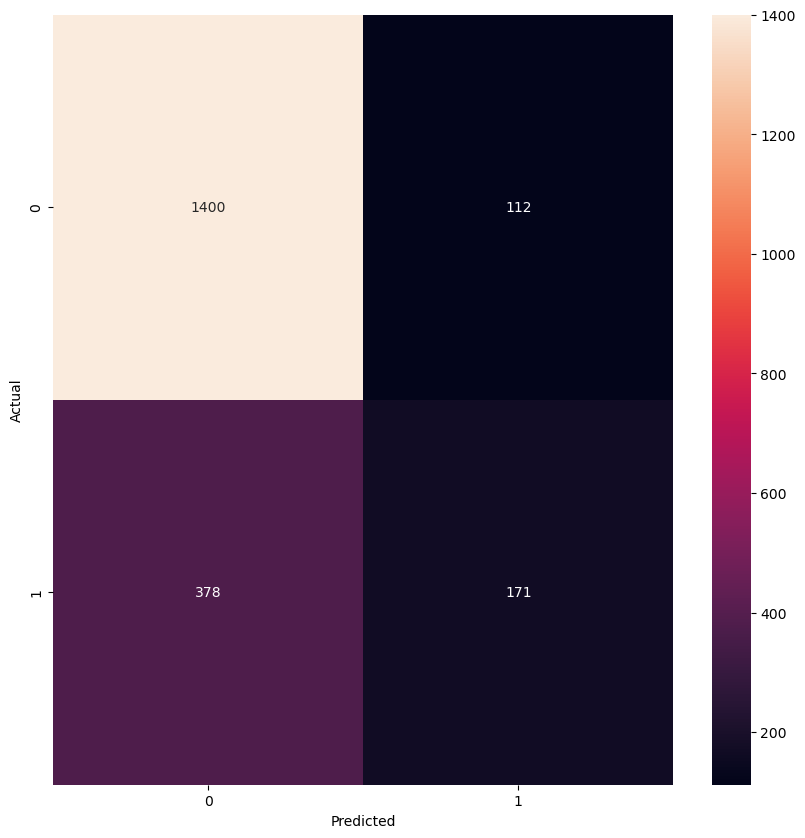

In [265]:
conf_mat = confusion_matrix(y_test,lst)
print(metrics.classification_report(y_test,lst))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

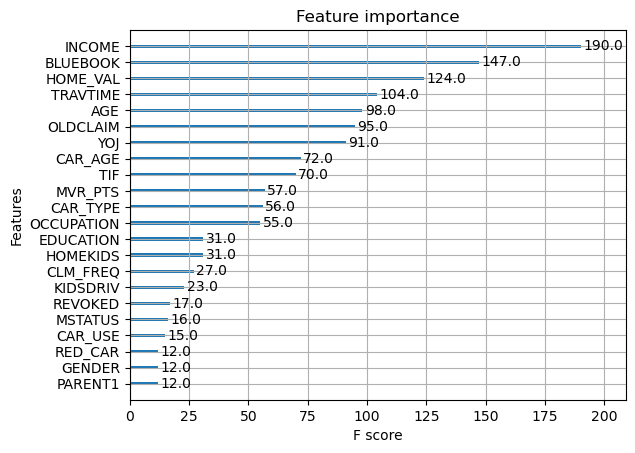

In [266]:
plot_importance(xgb_cl)

**Poisson dağılımı : En çok karşılaşılabilecek dağılım = frekans bilgisi için = kesikli = histogram gibi**

- t0-t1 zaman aralığında ortalama kaç kamyon çıkacağını biliyor ama tam t0 veya tam t1 anında kaç kamyon çıkacağını bilmiyorsak bu dağılımı kullanabiliriz.

In [109]:
# frekans ör; hasar adedi/müşteri sayısı= hasarlı müşteri oranı
frq = df["CLAIM_FLAG"].sum()/df["ID"].count()
frq

0.2665501844302077

**Gama dağılımı: Sürekli dağılım = Serenity bilgisi için = sürekli**

- insanların yaptığı alışveriş tutarı miktarı, ortlama çektikleri kredi tutarı miktarı vb.

In [108]:
# severity ör; toplam hasar tutarı/hasar adedi=ortalama hasar
severity = df["CLM_AMT"].sum()/df["CLAIM_FLAG"].sum()
severity

5669.725782957028

---------------------

---------------------

------------------

In [68]:
df2 =  pd.read_csv("autodata.csv")

In [69]:
df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                       "KIDSDRIV":"count"}).reset_index()
df3["FRQ"] = df3.CLAIM_FLAG / df3.KIDSDRIV
df3 = df3[["ID","FRQ"]].sort_values(by= "FRQ",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)


In [70]:
### Sayısal olmasına rağmen içinde "$" , "," vb. geçen değişkenlere feature engineering yapıyoruz.
df = df5.copy()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

In [71]:
X = df.drop(["FRQ"],axis=1)
y = df.FRQ

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43, stratify=df.FRQ)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset freq mean : {p1:.2%}")
print(f"Test dataset freq mean : {p2:.2%}")

Train dataset freq mean : 26.66%
Test dataset freq mean : 26.64%


In [72]:
X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)


In [73]:
### BOOSTING MODELIYLE DEVAM EDELIM

xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(X_train_encoded,y_train)

X_test = target_encoder.transform(X_test)
pred = xgb_cl.predict(X_test)

In [74]:
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")
print(f"Hasarlıların Oralama Tahmini : {df_v[df_v.Actual == 1].Pred.mean():.2%}")
print(f"Hasarsızların Ortalama Tahmini : {df_v[df_v.Actual == 0].Pred.mean():.2%}")


Ortalama Başarı : 1.008225434130499
Hasarlıların Oralama Tahmini : 43.36%
Hasarsızların Ortalama Tahmini : 19.98%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

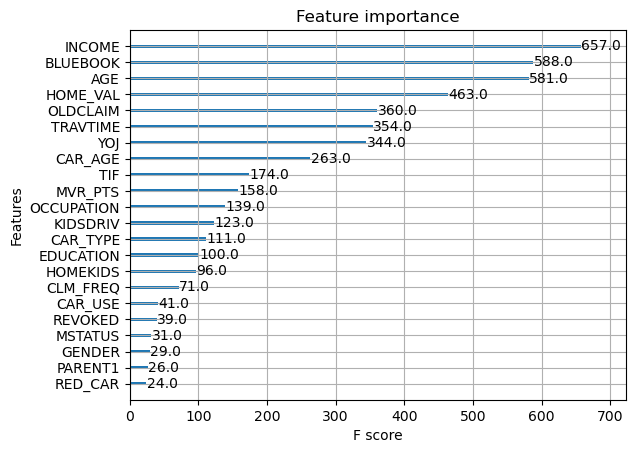

In [75]:
plot_importance(xgb_cl)

In [76]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'count:poisson',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

In [77]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-30 02:59:24,800] A new study created in memory with name: no-name-5ac3e076-f886-446e-bec4-cb00fdc4908b
[I 2023-04-30 02:59:25,871] Trial 0 finished with value: -0.0010630452655704392 and parameters: {'max_depth': 4, 'learning_rate': 0.02634843371467781, 'n_estimators': 357, 'min_child_weight': 10, 'gamma': 4.3992166560046665e-08, 'subsample': 0.0793444741306454, 'colsample_bytree': 0.021773093461423598, 'reg_alpha': 6.603253381740389e-08, 'reg_lambda': 1.2803502330472426e-05}. Best is trial 0 with value: -0.0010630452655704392.
[I 2023-04-30 02:59:28,958] Trial 1 finished with value: 0.10038194042184867 and parameters: {'max_depth': 8, 'learning_rate': 0.16228126674673182, 'n_estimators': 420, 'min_child_weight': 8, 'gamma': 0.41434828007364655, 'subsample': 0.2061481863153629, 'colsample_bytree': 0.4105996596486587, 'reg_alpha': 0.08908906384223848, 'reg_lambda': 0.013284714854306521}. Best is trial 1 with value: 0.10038194042184867.
[I 2023-04-30 02:59:30,093] Trial 2 fini

Number of finished trials: 20
Best trial:
  Value: 0.10038194042184867
  Params: 
    max_depth: 8
    learning_rate: 0.16228126674673182
    n_estimators: 420
    min_child_weight: 8
    gamma: 0.41434828007364655
    subsample: 0.2061481863153629
    colsample_bytree: 0.4105996596486587
    reg_alpha: 0.08908906384223848
    reg_lambda: 0.013284714854306521


In [78]:
params = trial.params
model_frq = xgb.XGBRegressor(**params)
model_frq.fit(X_train_encoded, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4105996596486587,
             enable_categorical=False, gamma=0.41434828007364655, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.16228126674673182, max_delta_step=0, max_depth=8,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=420, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0.08908906384223848,
             reg_lambda=0.013284714854306521, scale_pos_weight=1,
             subsample=0.2061481863153629, tree_method='exact',
             validate_parameters=1, verbosity=None)

Ortalama Başarı : 0.9852691724430708
Hasarlıların Oralama Tahmini : 43.72%
Hasarsızların Ortalama Tahmini : 20.85%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

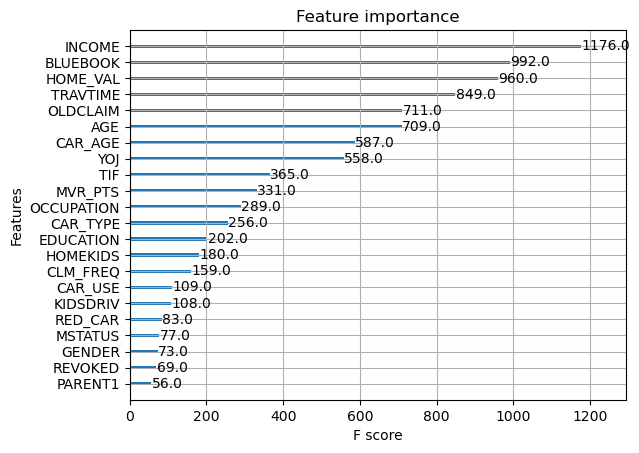

In [79]:
pred = model_frq.predict(X_test)
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")
print(f"Hasarlıların Oralama Tahmini : {df_v[df_v.Actual == 1].Pred.mean():.2%}")
print(f"Hasarsızların Ortalama Tahmini : {df_v[df_v.Actual == 0].Pred.mean():.2%}")
plot_importance(model_frq)

In [80]:
###########

In [92]:
df2 =  pd.read_csv("autodata.csv")

df2 = df2[df2.CLAIM_FLAG == 1]
df = df2.copy()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

df2 = df.copy()

df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                             "CLM_AMT" : "sum"}).reset_index()
df3["SEVERITY"] = df3.CLM_AMT / df3.CLAIM_FLAG
df3 = df3[["ID","SEVERITY"]].sort_values(by= "SEVERITY",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)


df5


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,SEVERITY
0,0,34.0,1,12.0,125301.0,Yes,0.0,z_No,z_F,Bachelors,...,17430.0,1,Sports Car,no,0.0,0,No,0,7.0,2946.0
1,1,40.0,1,11.0,50815.0,Yes,0.0,z_No,M,z_High School,...,18930.0,6,Minivan,no,3295.0,1,No,2,1.0,6477.0
2,1,37.0,2,NaN,107961.0,No,333680.0,Yes,M,Bachelors,...,16970.0,1,Van,yes,2374.0,1,Yes,10,7.0,8915.5
3,0,34.0,0,10.0,62978.0,No,0.0,z_No,z_F,Bachelors,...,11200.0,1,z_SUV,no,0.0,0,No,0,1.0,2501.0
4,0,53.0,0,14.0,77100.0,No,0.0,z_No,z_F,Masters,...,18300.0,1,Sports Car,no,0.0,0,No,0,11.0,6077.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0,43.0,0,NaN,0.0,No,55203.0,Yes,z_F,PhD,...,24030.0,9,Minivan,no,3035.0,4,No,0,14.0,471.0
2742,0,46.0,0,10.0,68360.0,No,237457.0,z_No,M,Bachelors,...,12940.0,1,Minivan,no,6560.0,3,No,7,11.0,3135.0
2743,0,41.0,0,12.0,92185.0,No,289370.0,Yes,M,z_High School,...,1500.0,11,Minivan,yes,0.0,0,No,0,10.0,1815.0
2744,0,45.0,0,11.0,52966.0,No,0.0,z_No,M,z_High School,...,11300.0,6,Pickup,yes,16239.0,2,Yes,5,1.0,2967.0


Fitting 10 distributions:   0%|                                                                 | 0/10 [00:00<?, ?it/s]2023-04-30 03:04:14,162 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=2.8093103022526218e-08)
2023-04-30 03:04:14,478 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=6.018887844950477e-09)
Fitting 10 distributions:  30%|█████████████████                                        | 3/10 [00:01<00:02,  2.67it/s]2023-04-30 03:04:15,147 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=4.5525176203309496e-08)
2023-04-30 03:04:15,173 | INFO | fitter.py:335 | _fit_single_distribution | Fitted chi2 distribution with error=2.3520400260636256e-08)
2023-04-30 03:04:15,195 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distribution with error=3.4392481489657894e-08)
2023-04-30 03:04:15,205 | INFO | fitter.py:335 | _fit_single_distribution | 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,6.018888e-09,3029.358016,-73704.004935,inf,0.115771,1.607739e-32
lognorm,7.458748e-09,3505.847684,-73107.110907,inf,0.092207,9.089748e-21
gamma,1.630823e-08,7660.826284,-70958.964616,inf,0.183470,2.265595e-81
chi2,2.352040e-08,7349.357544,-69953.383382,inf,0.204729,2.117488e-101
expon,2.809310e-08,3926.067551,-69473.458013,inf,0.146642,5.305713e-52


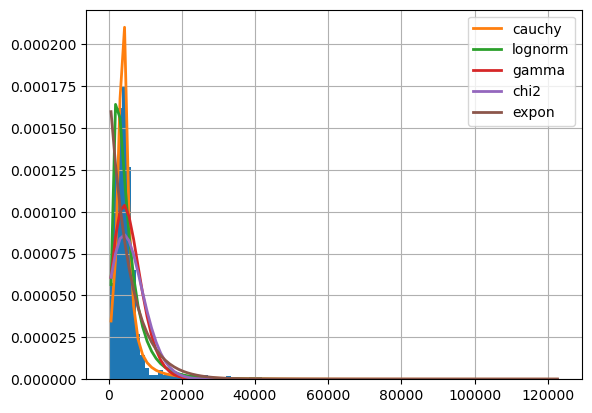

In [93]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.SEVERITY,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [94]:
### Sayısal olmasına rağmen içinde "$" , "," vb. geçen değişkenlere feature engineering yapıyoruz.
df = df5.copy()

X = df.drop(["SEVERITY"],axis=1)
y = df.SEVERITY

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset SEVERITY mean : {p1}")
print(f"Test dataset SEVERITY mean : {p2}")

X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)

### BOOSTING MODELIYLE DEVAM EDELIM

xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(X_train_encoded,y_train)

X_test = target_encoder.transform(X_test)
pred = xgb_cl.predict(X_test)

Train dataset SEVERITY mean : 5698.605646630236
Test dataset SEVERITY mean : 5554.416363636364


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

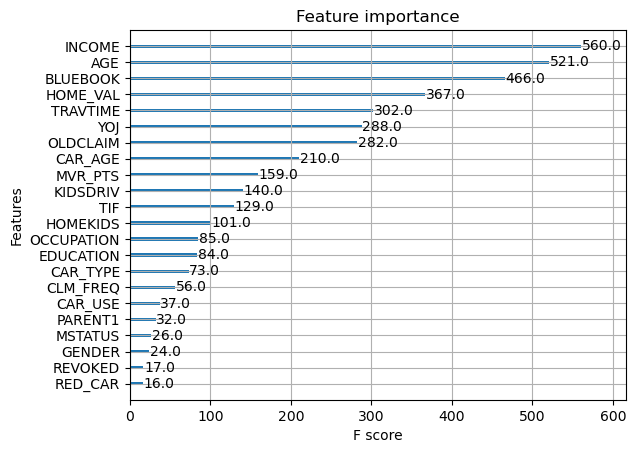

In [95]:
plot_importance(xgb_cl)

In [96]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'reg:gamma',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

In [97]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-30 03:04:17,255] A new study created in memory with name: no-name-bfc856cf-31e0-47bc-b579-9d7bda64165a
[I 2023-04-30 03:04:17,740] Trial 0 finished with value: -0.022211838593876765 and parameters: {'max_depth': 3, 'learning_rate': 0.22639080541151765, 'n_estimators': 60, 'min_child_weight': 6, 'gamma': 0.0004995122448987867, 'subsample': 0.3519220728303195, 'colsample_bytree': 0.01450053400197699, 'reg_alpha': 0.07483175926800228, 'reg_lambda': 0.16679888211118396}. Best is trial 0 with value: -0.022211838593876765.
[I 2023-04-30 03:04:18,030] Trial 1 finished with value: 198.6142117060509 and parameters: {'max_depth': 5, 'learning_rate': 0.018295787463299188, 'n_estimators': 220, 'min_child_weight': 8, 'gamma': 0.0002688013948415978, 'subsample': 0.03231110594358324, 'colsample_bytree': 0.1161385140417345, 'reg_alpha': 1.5862967681479007e-06, 'reg_lambda': 0.0019141992883875726}. Best is trial 1 with value: 198.6142117060509.
[I 2023-04-30 03:04:18,156] Trial 2 finished wi

Number of finished trials: 20
Best trial:
  Value: 857.1309246664266
  Params: 
    max_depth: 8
    learning_rate: 0.010046858406499218
    n_estimators: 255
    min_child_weight: 9
    gamma: 0.016010271403200445
    subsample: 0.01193343705415338
    colsample_bytree: 0.29699534167683767
    reg_alpha: 7.930857056001107e-06
    reg_lambda: 1.3237779881121278e-06


In [98]:
params = trial.params
model_sev = xgb.XGBRegressor(**params)
model_sev.fit(X_train_encoded, y_train)
pred = model_sev.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

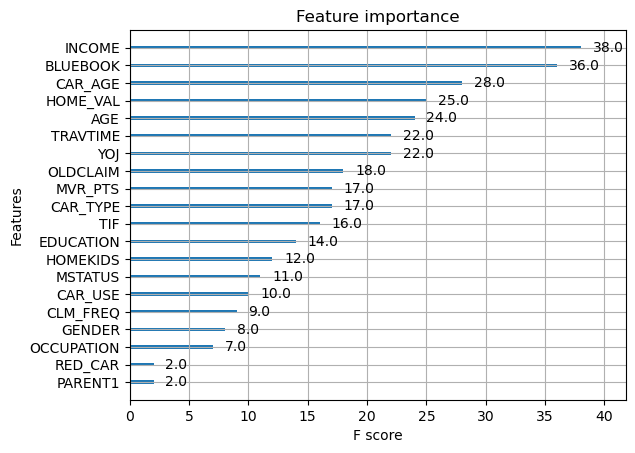

In [99]:
plot_importance(model_sev)

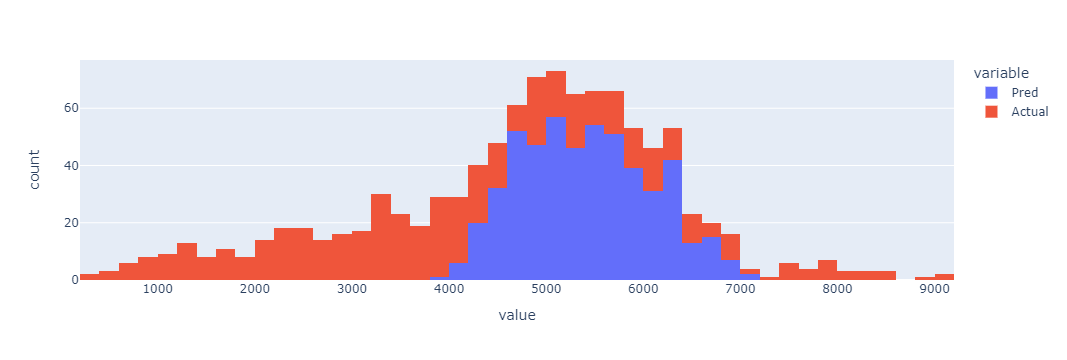

In [100]:
prob_data = pd.DataFrame({"Actual" : y_test,
                          "Pred" : pred})

prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data2, x=["Pred","Actual"])
fig.show()

In [101]:
pickle.dump(model_frq, open('FRQ_Model.sav','wb'))
pickle.dump(model_sev, open('SEV_Model.sav','wb'))
pickle.dump(target_encoder, open('Target_Encoder.sav','wb'))
